In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar, minimize, fsolve
import sympy as sp

# Метод Фибоначчи
В данной задаче вам необходимо реализовать метод Фибоначчи для функций двух типов:
$$
f_0(x) = c_0 x^2 + c_1 x + c_2, 
\quad
f_1(x) = c_0 x^4 + c_1 x^3 + c_2 x^2 + c_3 x + c_4.
$$
В качестве параметра $\xi$ для последнего шага возьмите значение $\xi = 0.01$. На последнем шаге вы должны отнять $\xi$ от $p = 0.5$ и сделать последнюю итерацию алгоритма.

Формат ввода:
## Формат ввода

- **t** — тип функции (0 или 1)
- **c<sub>0</sub> … c<sub>n</sub>** — коэффициенты целевой функции, где *n* это 3 или 5, в зависимости от типа.
- **l r k** — границы интервала поиска и критерий остановки $|r - l| \le k$.

## Формат вывода

Середина интервала неопределенности. Проверяется с точностью `1.0E-2`.

In [2]:
class FibonacciSearch:
    def __init__(self, func_type: int, coef: list, l: float, r: float, tol: float, xi: float = 0.01):
        """
        Args:
            func_type: тип функции (0 или 1).
            coef: коэффициенты функции (3 штуки для type=0, 5 штук для type=1).
            l: левая граница интервала.
            r: правая граница интервала.
            tol: критерий остановки ( |r - l| <= tol ).
            xi: смещение для последнего шага, если r = 1.6 (по условию).
        """
        self.func_type = func_type
        self.coef = coef
        self.l = l
        self.r = r
        self.tol = tol
        self.xi = xi
        self.history = []
        self.f = self._select_function(func_type)

    def _select_function(self, func_type: int):
        if func_type == 0:
            c0, c1, c2 = self.coef
            return lambda x: c0 * x ** 2 + c1 * x + c2
        elif func_type == 1:
            c0, c1, c2, c3, c4 = self.coef
            return lambda x: c0 * x ** 4 + c1 * x ** 3 + c2 * x ** 2 + c3 * x + c4
        else:
            raise ValueError

    @staticmethod
    def fib_iter(n: int) -> int:
        if n < 2:
            return 1
        f_prev, f_curr = 1, 1
        for _ in range(2, n + 1):
            f_prev, f_curr = f_curr, f_prev + f_curr
        return f_curr

    def find_minimum(self, record_history: bool = True) -> float:
        l, r = self.l, self.r

        if record_history:
            self.history.append((l, r))

        if (r - l) <= self.tol:
            return (l + r) / 2

        length = r - l
        ratio = length / self.tol
        n = 0
        while self.fib_iter(n) < ratio:
            n += 1

        F_n = self.fib_iter(n)
        F_n_1 = self.fib_iter(n - 1) if n - 1 >= 0 else 1
        F_n_2 = self.fib_iter(n - 2) if n - 2 >= 0 else 1

        x1 = l + (F_n_2 / F_n) * (r - l)
        x2 = l + (F_n_1 / F_n) * (r - l)
        f1_val = self.f(x1)
        f2_val = self.f(x2)

        # Основной цикл
        for i in range(n - 2):
            if (r - l) <= self.tol:
                break

            if f1_val > f2_val:
                l = x1
                x1 = x2
                f1_val = f2_val

                F_n_i_3 = self.fib_iter(n - i - 2)
                F_n_i_1 = self.fib_iter(n - i - 1)
                if (r - l) > 1e-15:
                    x2 = l + (F_n_i_3 / F_n_i_1) * (r - l)
                else:
                    x2 = (l + r) / 2
                f2_val = self.f(x2)
            else:
                r = x2
                x2 = x1
                f2_val = f1_val

                F_n_i_3 = self.fib_iter(n - i - 3)
                F_n_i_1 = self.fib_iter(n - i - 1)
                if (r - l) > 1e-15:
                    x1 = l + (F_n_i_3 / F_n_i_1) * (r - l)
                else:
                    x1 = (l + r) / 2
                f1_val = self.f(x1)

            if record_history:
                self.history.append((l, r))

        return (l + r) / 2

    def plot_history(self):
        if not self.history:
            return

        fig, ax = plt.subplots()
        for i, (l_val, r_val) in enumerate(self.history):
            ax.hlines(i, l_val, r_val, colors='blue', lw=2)
            ax.plot([l_val, r_val], [i, i], 'ro')
        ax.set_xlabel('x')
        ax.set_ylabel('Итерация')
        ax.set_title('История сужения интервала')
        ax.invert_yaxis()
        plt.show()

    def plot_function(self, num_points: int = 400):
        x_vals = np.linspace(self.l, self.r, num_points)
        y_vals = [self.f(x) for x in x_vals]

        plt.figure()
        plt.plot(x_vals, y_vals, label='Исходная функция')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('График исходной функции')
        plt.legend()
        plt.grid(True)
        plt.show()

#### Пример работы:

Минимум в точке: 8.000591278640059


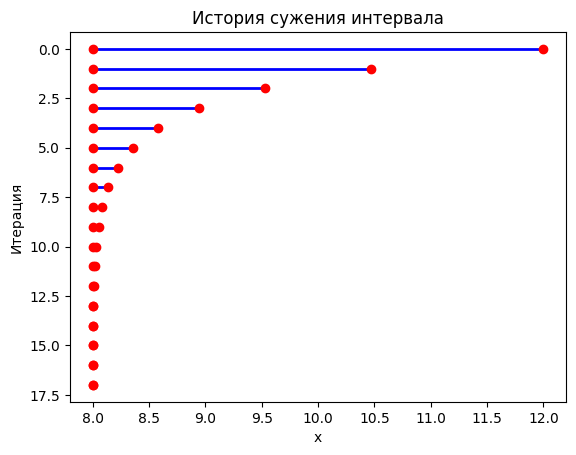

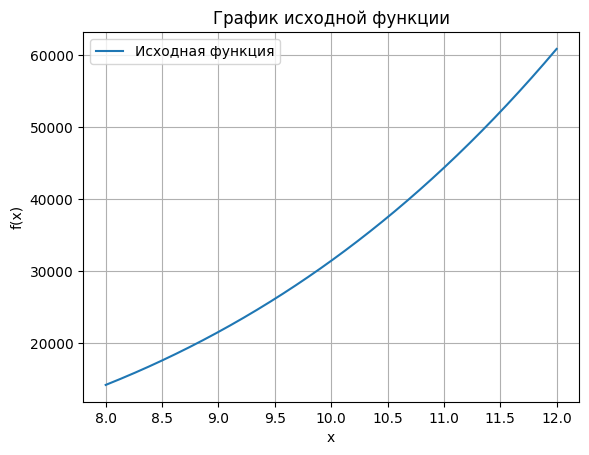

In [3]:
func_type = 1
coef = [2, 10, 17, -25, -24]
l = 8
r = 12
tol = 0.0007

fib_searcher = FibonacciSearch(func_type, coef, l, r, tol)
minumum = fib_searcher.find_minimum()
print(f'Минимум в точке: {minumum}')

fib_searcher.plot_history()
fib_searcher.plot_function()

Минимум в точке: -2.0001693862571286


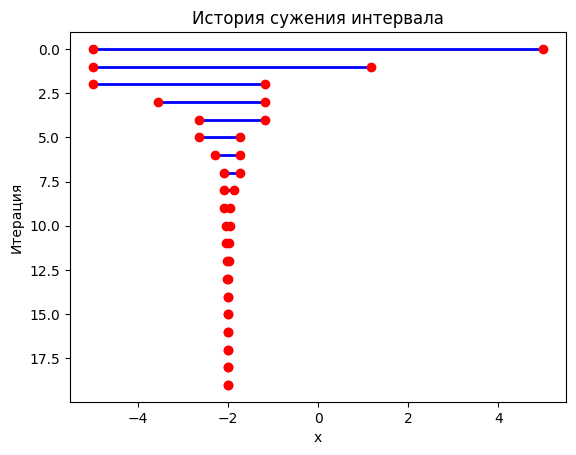

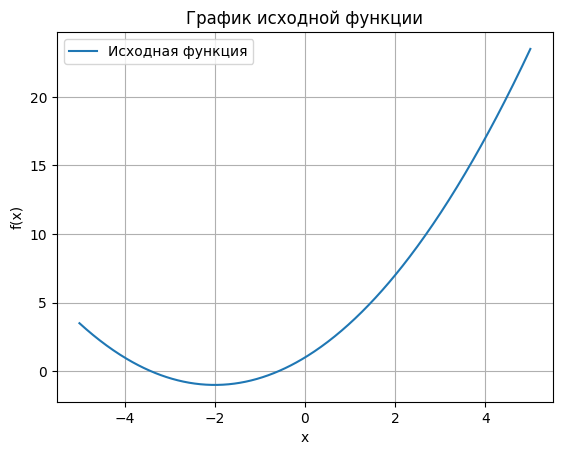

In [4]:
func_type = 0
coef = [0.5, 2, 1]
l = -5
r = 5
tol = 0.0007

fib_searcher = FibonacciSearch(func_type, coef, l, r, tol)
minumum = fib_searcher.find_minimum()
print(f'Минимум в точке: {minumum}')

fib_searcher.plot_history()
fib_searcher.plot_function()

# Метод секущих

В данной задаче вам необходимо реализовать метод секущих для функций двух типов:

1. $f_0(x) = (c_0x - 1)^2 + 4(4 - c_1x)^4$
3. $f_1(x) = c_0(x - c_1) + (x - c_2)^2$

Формула метода секущих:
$x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)}$
где
$f''(x_k) = \frac{f'(x_k) - f'(x_{k-1})}{x_k - x_{k-1}}$

## Формат ввода:
- $t$ - тип функции (0 или 1)
- $c_0 \dots c_n$ - коэффициенты целевой функции, где $n$ это 1 или 2, в зависимости от типа
- $x_0$ и $k$ - первые две точки поиска и критерий остановки $|x - x_{new}| < k$

## Формат вывода:
Координаты найденной точки. Проверяется точность до первых 2 знаков после запятой.

### Первые производные функций:
$f_0'(x) = 2c_0\bigl(c_0x - 1\bigr) - 16c_1\bigl(4 - c_1x\bigr)^3$

$f_1'(x) = c_0 + 2(x - c_2)$

In [5]:
class SecantSearch:
    def __init__(self, func_type: int, coef: list, x0: float, x1: float, k: float = 1e-6):
        self.func_type = func_type
        self.coef = coef
        self.x0 = x0
        self.x1 = x1
        self.k = k
        self.f_prime = self._select_function_prime(func_type)
        self.history = []

    def _select_function_prime(self, func_type: int):
        if func_type == 0:
            c0, c1 = self.coef
            return lambda x: 2 * c0 * (c0 * x - 1) - 16 * c1 * (4 - c1 * x) ** 3
        else:
            c0, _, c2 = self.coef
            return lambda x: c0 + 2 * (x - c2)

    def find_minimum(self, max_iter: int = 1000) -> float:
        x_prev, x_cur = self.x0, self.x1
        self.history = [x_prev, x_cur]

        for _ in range(max_iter):
            f_prime_prev = self.f_prime(x_prev)
            f_prime_cur = self.f_prime(x_cur)
            denom = x_cur - x_prev

            if abs(denom) < 1e-15:
                raise ZeroDivisionError

            f_second_prime_approx = (f_prime_cur - f_prime_prev) / denom

            if abs(f_second_prime_approx) < 1e-15:
                raise ZeroDivisionError

            x_next = x_cur - (f_prime_cur / f_second_prime_approx)
            self.history.append(x_next)

            if abs(x_next - x_cur) < self.k:
                return x_next

            x_prev, x_cur = x_cur, x_next
        return x_next

    def _select_function(self, func_type: int):
        if func_type == 0:
            c0, c1, = self.coef
            return lambda x: (c0 * x - 1) ** 2 + 4 * (4 - c1 * x) ** 4
        else:
            c0, c1, c2 = self.coef
            return lambda x: c0 * (x - c1) + (x - c2) ** 2

    def plot_history(self):
        if not self.history:
            return

        iterations = np.arange(len(self.history))
        plt.figure()
        plt.plot(iterations, self.history)
        plt.xlabel('Итерация')
        plt.ylabel('x')
        plt.title('Изменения x_k')
        plt.grid(True)
        plt.show()

    def plot_function(self, num_points: int = 400):
        x_vals = np.linspace(min(self.history) - 1, max(self.history) + 1, num_points)
        y_vals = [self._select_function(self.func_type)(x) for x in x_vals]
        plt.figure()
        plt.plot(x_vals, y_vals, label='Исходная функция')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('График исходной функции')
        plt.legend()
        plt.grid(True)
        plt.show()


#### Пример работы:

-3.5


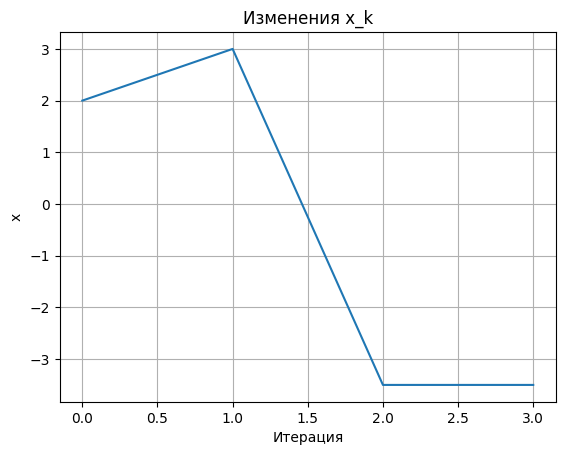

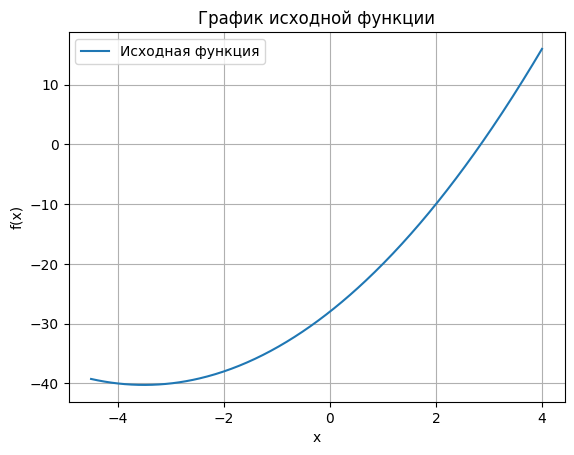

In [6]:
t = 1
coef = [-7, -11, -7]
x0, x1, k = 2, 3, 0.0004

secant_searcher = SecantSearch(t, coef, x0, x1, k)
x_min = secant_searcher.find_minimum()
print(x_min)
secant_searcher.plot_history()
secant_searcher.plot_function()

2.628166909774177


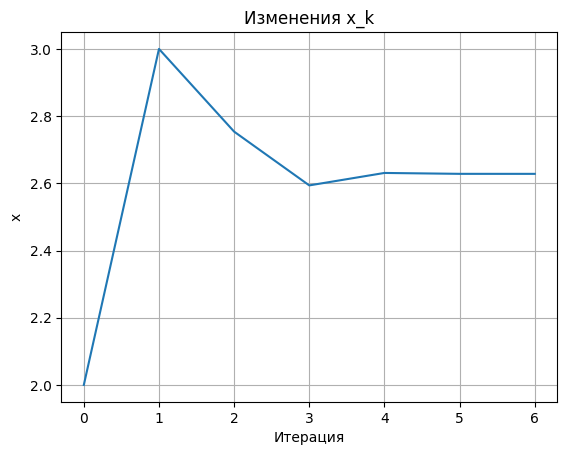

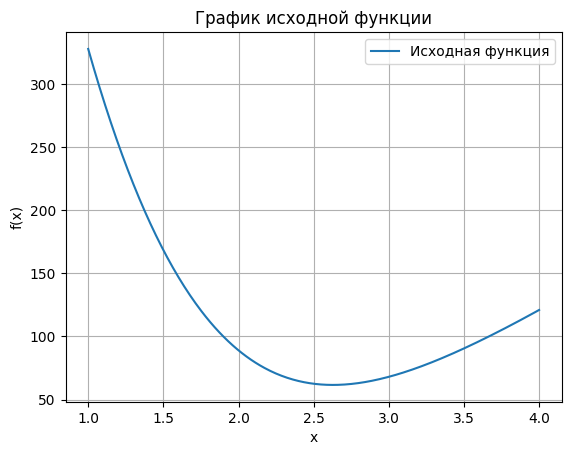

In [7]:
t = 0
coef = [3, 1]
x0, x1, k = 2, 3, 0.0004

secant_searcher = SecantSearch(t, coef, x0, x1, k)
x_min = secant_searcher.find_minimum()
print(x_min)
secant_searcher.plot_history()
secant_searcher.plot_function()

# Метод Хука-Дживса

В данной задаче вам необходимо реализовать метод Хука-Дживса для функций двух типов:

1. $f_0(x) = c_0x_1^4 + c_1x_2^3 + c_2x_2^2 + c_3x_1 + c_4$
2. $f_1(x) = x_1^2 + c_0x_1x_2 + c_1(x_2 - 3)^2$

## Параметры для запуска:
- Начальный шаг: $\Delta = [1, 1]$
- Коэффициент уменьшения шага: $\alpha = 2$
- Параметр растяжения: $\lambda = 1$

## Формат ввода:
- `t` — тип функции (0 или 1)
- `c0...cn` — коэффициенты целевой функции:
  - Для `t=0`: `c0 c1 c2 c3 c4` (5 коэффициентов)
  - Для `t=1`: `c0 c1` (2 коэффициента)
- `x1 x2` — координаты начальной точки
- `k` — критерий остановки $\Delta < k\$

## Формат вывода:
Две координаты найденной точки через пробел. 

In [8]:
class HookeJeevesSearch:
    def __init__(self, func_type: int, coef: list, x0: list, k: int):
        self.func_type = func_type
        self.coef = coef
        self.x = x0[:]
        self.k = k
        self.delta = [1, 1]
        self.alpha = 2
        self.lmbda = 1
        self.f = self._select_function(func_type)
        self.history = []

    def _select_function(self, func_type: int):
        if func_type == 0:
            c0, c1, c2, c3, c4 = self.coef
            return lambda x: c0 * x[0] ** 4 + c1 * x[1] ** 3 + c2 * x[1] ** 2 + c3 * x[0] + c4
        else:
            c0, c1 = self.coef
            return lambda x: x[0] ** 2 + c0 * x[0] * x[1] + c1 * (x[1] - 3) ** 2

    def exploratory_search(self, base: list) -> list:
        new_point = base[:]
        for i in range(2):
            candidate = new_point[:]
            candidate[i] += self.delta[i]
            if self.f(candidate) < self.f(new_point):
                new_point = candidate
            else:
                candidate = new_point[:]
                candidate[i] -= self.delta[i]
                if self.f(candidate) < self.f(new_point):
                    new_point = candidate
        return new_point

    def search(self) -> list:
        base = self.x[:]
        while self.delta[0] >= self.k or self.delta[1] >= self.k:
            new_point = self.exploratory_search(base)
            if self.f(new_point) < self.f(base):
                pattern = [new_point[i] + self.lmbda * (new_point[i] - base[i]) for i in range(2)]
                if self.f(pattern) < self.f(new_point):
                    base = pattern
                else:
                    base = new_point
            else:
                self.delta = [d / self.alpha for d in self.delta]
            self.history.append(base[:])
            self.x = base[:]
        return self.x

    def plot_history(self):
        x_vals = [x for x, y in self.history]
        y_vals = [y for x, y in self.history]
        plt.figure()
        plt.plot(x_vals, y_vals, 'bo-', label='Путь поиска')
        plt.plot(x_vals[-1], y_vals[-1], 'r*', markersize=15, label='Найденный минимум')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.title('История поиска минимума')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_function(self, num_points: int = 100):
        all_points = self.history + [self.x]
        x1_vals = [pt[0] for pt in all_points]
        x2_vals = [pt[1] for pt in all_points]
        margin = 1
        x1_min, x1_max = min(x1_vals) - margin, max(x1_vals) + margin
        x2_min, x2_max = min(x2_vals) - margin, max(x2_vals) + margin

        X1, X2 = np.meshgrid(np.linspace(x1_min, x1_max, num_points), np.linspace(x2_min, x2_max, num_points))
        Z = np.zeros_like(X1)
        for i in range(num_points):
            for j in range(num_points):
                Z[i, j] = self.f([X1[i, j], X2[i, j]])

        plt.figure()
        cp = plt.contourf(X1, X2, Z, levels=50, cmap='viridis')
        plt.colorbar(cp)
        x_hist = [pt[0] for pt in self.history]
        y_hist = [pt[1] for pt in self.history]
        plt.plot(x_hist, y_hist, 'w.-', markersize=10, label='Путь поиска')
        plt.plot(x_hist[-1], y_hist[-1], 'r*', markersize=15, label='Найденный минимум')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.title('График функции с путем поиска минимума')
        plt.legend()
        plt.show()

#### Пример работы:

-2.0 4.0


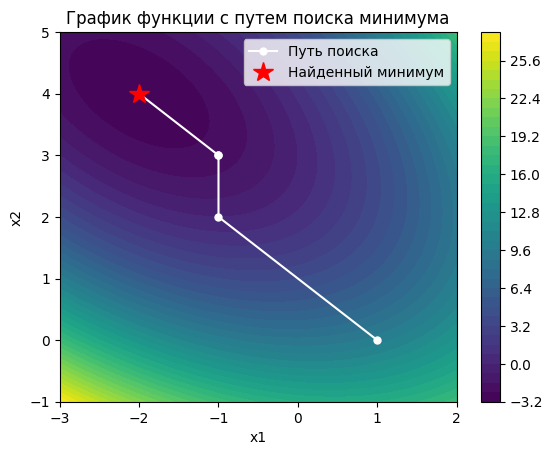

In [9]:
t = 1
coef = [1, 1]
x0 = [1, -2]
k = 0.0009

hj_searcher = HookeJeevesSearch(t, coef, x0, k)
x_min = hj_searcher.search()
print(*x_min)

hj_searcher.plot_function()

-0.89453125 0


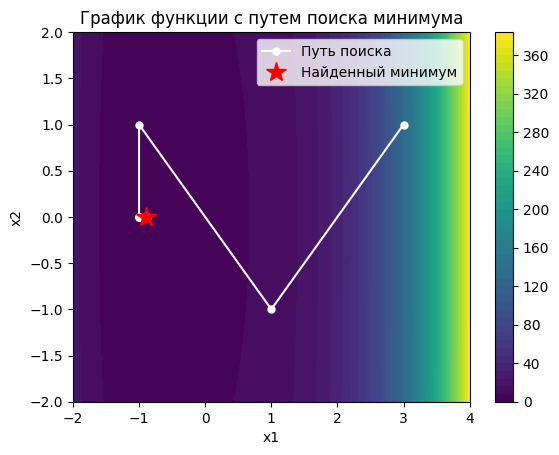

In [10]:
t = 0
coef = [1.4, 0, 0.3, 4, 5]
x0 = [5, 3]
k = 0.001

hj_searcher = HookeJeevesSearch(t, coef, x0, k)
x_min = hj_searcher.search()
print(*x_min)

hj_searcher.plot_function()

In [11]:
# для проверки 
f0 = hj_searcher.f
res = minimize(f0, x0, method='Powell', tol=k)
res.x

array([-8.94022557e-01, -2.28963744e-08])

# Метод Нелдера-Мида

В данной задаче вам необходимо реализовать метод Нелдера–Мида для функций двух типов:

- $f_0(x) = 4(x_0 - c_0)^2 + (x_1 - c_1)^2$
- $f_1(x) = (x_0 - c_0)^2 + x_0 x_1 + c_1(x_1 - 3)^2$

Обозначим:

$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=0}^{N}(f(x_i) - f(x_{mid}))^2}
$$

где $x_{mid}$ — центр тяжести симплекса без худшей вершины $x_h$, а $x_i$ — вершины симплекса.

Алгоритм завершает работу, когда $\sigma < k$.

Параметры для запуска:
- $\alpha = 1$
- $\beta = 0.5$
- $\gamma = 2$


## Формат ввода:

- `t` — тип функции (`0` или `1`)  
- `c₀ c₁` — коэффициенты  
- `x₀ x₁` — координаты первой начальной точки  
- `y₀ y₁` — координаты второй начальной точки  
- `z₀ z₁` — координаты третьей начальной точки  
- `k` — критерий остановки

## Формат вывода:

Вывести значение целевой функции в вершине с минимальным значением целевой функции.

In [12]:
class NelderMeadSearch:
    def __init__(self, func_type: int, coef: list, simplex: list, alpha: float = 1.0, beta: float = 0.5,
                 gamma: float = 2, max_iter: int = 1000):
        self.func_type = func_type
        self.coef = coef
        self.simplex = [pt[:] for pt in simplex]
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.max_iter = max_iter
        self.f = self._f0 if func_type == 0 else self._f1

    def _f0(self, x: list) -> float:
        c0, c1 = self.coef
        return 4 * (x[0] - c0) ** 2 + (x[1] - c1) ** 2

    def _f1(self, x: list) -> float:
        c0, c1 = self.coef
        return (x[0] - c0) ** 2 + x[0] * x[1] + c1 * (x[1] - 3) ** 2

    def search(self, k: float) -> tuple:
        for _ in range(self.max_iter):
            self.simplex.sort(key=self.f)
            best = self.simplex[0]
            second = self.simplex[1]
            worst = self.simplex[2]

            x_mid = [(best[i] + second[i]) / 2 for i in range(2)]

            f_vals = [self.f(pt) for pt in self.simplex]
            f_mid = self.f(x_mid)
            sigma = np.sqrt(np.mean([(f - f_mid) ** 2 for f in f_vals]))
            if sigma < k:
                break

            x_r = [x_mid[i] + self.alpha * (x_mid[i] - worst[i]) for i in range(2)]
            f_r = self.f(x_r)

            if f_r < self.f(best):
                x_e = [x_mid[i] + self.gamma * (x_r[i] - x_mid[i]) for i in range(2)]
                if self.f(x_e) < f_r:
                    self.simplex[2] = x_e
                else:
                    self.simplex[2] = x_r
            elif f_r < self.f(second):
                self.simplex[2] = x_r
            else:
                if f_r < self.f(worst):
                    x_c = [x_mid[i] + self.beta * (x_r[i] - x_mid[i]) for i in range(2)]
                else:
                    x_c = [x_mid[i] - self.beta * (x_mid[i] - worst[i]) for i in range(2)]

                if self.f(x_c) < self.f(worst):
                    self.simplex[2] = x_c
                else:
                    for i in range(1, 3):
                        self.simplex[i] = [best[j] + 0.5 * (self.simplex[i][j] - best[j]) for j in range(2)]

        self.best_point = min(self.simplex, key=self.f)
        return self.f(self.best_point), self.best_point, self.simplex

    def plot_function(self, num_points: int = 100):
        pts = np.array(self.simplex)
        x_min, x_max = pts[:, 0].min() - 1, pts[:, 0].max() + 1
        y_min, y_max = pts[:, 1].min() - 1, pts[:, 1].max() + 1

        X, Y = np.meshgrid(np.linspace(x_min, x_max, num_points),
                           np.linspace(y_min, y_max, num_points))
        Z = np.zeros_like(X)
        for i in range(num_points):
            for j in range(num_points):
                Z[i, j] = self.f([X[i, j], Y[i, j]])

        plt.figure()
        cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
        plt.colorbar(cp)
        plt.plot(self.best_point[0], self.best_point[1], 'r*', markersize=15, label='Минимум')
        plt.xlabel('x₀')
        plt.ylabel('x₁')
        plt.title('График функции с найденым минимумом')
        plt.legend()
        plt.grid(True)
        plt.show()


Минимум функции: 0.000000
Координаты точки минимума: [1.9999244774924136, 3.0005081984791104]
Финальный симплекс:
  [1.999924, 3.000508]
  [2.000071, 2.999054]
  [2.000512, 2.999561]


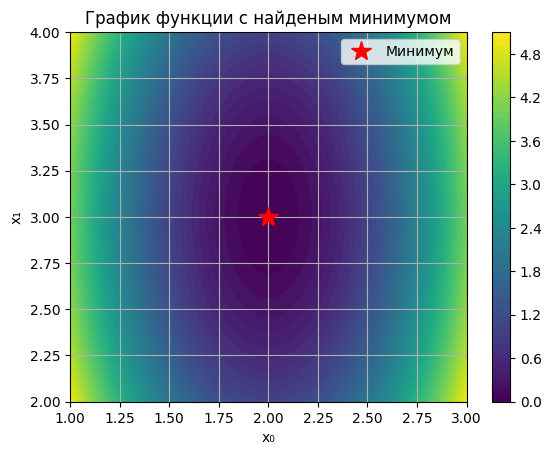

In [13]:
func_type = 0
coef = [2.0, 3.0]
simplex = [
    [0.0, 0.0],
    [1.0, 2.0],
    [2.0, 1.0]
]
k = 1e-6

nm = NelderMeadSearch(func_type, coef, simplex)
best_val, best_point, final_simplex = nm.search(k)

print(f"Минимум функции: {best_val:.6f}")
print(f"Координаты точки минимума: {best_point}")
print("Финальный симплекс:")
for pt in final_simplex:
    print(f"  [{pt[0]:.6f}, {pt[1]:.6f}]")

nm.plot_function()

# Аналитическая часть

## Аналитический метод нахождения экстремумов в многомерной безусловной оптимизации

[Страницы 1-3](https://disk.yandex.ru/i/ndm-FaSbUQKGmA)

<img src="https://raw.githubusercontent.com/Bo0od9/opt/7245a8ba7566b04dfc66ec430b63ceade30ff222/HW1/img/Page01.png">

<img src="https://raw.githubusercontent.com/Bo0od9/opt/7245a8ba7566b04dfc66ec430b63ceade30ff222/HW1/img/Page02.png">

<img src="https://raw.githubusercontent.com/Bo0od9/opt/7245a8ba7566b04dfc66ec430b63ceade30ff222/HW1/img/Page03.png">

In [14]:
# Код для поиска всех решений системы
x, y, z = sp.symbols('x y z', real=True)

eq1 = sp.Eq(4 * x ** 3 - 8 * x + 2 * y + 2 * z, 0)
eq2 = sp.Eq(4 * y ** 3 - 8 * y + 2 * x + 2 * z, 0)
eq3 = sp.Eq(4 * z ** 3 - 8 * z + 2 * x + 2 * y, 0)

solutions = sp.solve([eq1, eq2, eq3], (x, y, z), dict=True)

for sol in solutions:
    sp.pprint(sol)

{x: -1, y: -1, z: -1}
{x: 0, y: 0, z: 0}
⎧         -√10      √10⎫
⎨x: 0, y: ─────, z: ───⎬
⎩           2        2 ⎭
⎧         √10     -√10 ⎫
⎨x: 0, y: ───, z: ─────⎬
⎩          2        2  ⎭
{x: 1, y: 1, z: 1}
⎧   -√10            √10⎫
⎨x: ─────, y: 0, z: ───⎬
⎩     2              2 ⎭
⎧   -√10      √10      ⎫
⎨x: ─────, y: ───, z: 0⎬
⎩     2        2       ⎭
⎧   √10           -√10 ⎫
⎨x: ───, y: 0, z: ─────⎬
⎩    2              2  ⎭
⎧   √10     -√10       ⎫
⎨x: ───, y: ─────, z: 0⎬
⎩    2        2        ⎭


In [15]:
# Код для решения этой задачи с помощью sympy
x, y, z = sp.symbols('x y z', real=True)

f = x ** 4 + y ** 4 + z ** 4 - 4 * (x ** 2 + y ** 2 + z ** 2) + 2 * (x * y + y * z + x * z)

grad_f = [sp.diff(f, var) for var in (x, y, z)]

crit_points = sp.solve(grad_f, (x, y, z), dict=True)

H = sp.hessian(f, (x, y, z))


def classify_point(H_cp):
    eigenvals = H_cp.eigenvals()
    eigen_list = list(eigenvals.keys())
    eigen_num = [ev.evalf() for ev in eigen_list]
    print('Собственные значения: ', eigen_num)
    if all(ev > 0 for ev in eigen_num):
        return 'Локальный минимум'
    elif all(ev < 0 for ev in eigen_num):
        return 'Локальный максимум'
    else:
        return 'Седловая точка'


for cp in crit_points:
    print('Критическая точка:')
    sp.pprint(cp)
    H_cp = H.subs(cp)
    print('Гессиан в данной точке:')
    sp.pprint(H_cp)
    nature = classify_point(H_cp)
    print('Характер точки: ', nature)
    print('-' * 80)


Критическая точка:
{x: -1, y: -1, z: -1}
Гессиан в данной точке:
⎡4  2  2⎤
⎢       ⎥
⎢2  4  2⎥
⎢       ⎥
⎣2  2  4⎦
Собственные значения:  [8.00000000000000, 2.00000000000000]
Характер точки:  Локальный минимум
--------------------------------------------------------------------------------
Критическая точка:
{x: 0, y: 0, z: 0}
Гессиан в данной точке:
⎡-8  2   2 ⎤
⎢          ⎥
⎢2   -8  2 ⎥
⎢          ⎥
⎣2   2   -8⎦
Собственные значения:  [-4.00000000000000, -10.0000000000000]
Характер точки:  Локальный максимум
--------------------------------------------------------------------------------
Критическая точка:
⎧         -√10      √10⎫
⎨x: 0, y: ─────, z: ───⎬
⎩           2        2 ⎭
Гессиан в данной точке:
⎡-8  2   2 ⎤
⎢          ⎥
⎢2   22  2 ⎥
⎢          ⎥
⎣2   2   22⎦
Собственные значения:  [20.0000000000000, -8.24807680927192, 24.2480768092719]
Характер точки:  Седловая точка
--------------------------------------------------------------------------------
Критическая точка:
⎧        

## Метод золотого сечения
[Страницы 4-5](https://disk.yandex.ru/i/ndm-FaSbUQKGmA)

<img
src="https://raw.githubusercontent.com/Bo0od9/opt/7245a8ba7566b04dfc66ec430b63ceade30ff222/HW1/img/Page04.png">

<img
src="https://raw.githubusercontent.com/Bo0od9/opt/7245a8ba7566b04dfc66ec430b63ceade30ff222/HW1/img/Page05.png">

Так же напишем код для нахождения минимума данной функции

In [16]:
def f(x):
    return math.exp(x) + x ** 2 - 4 * x


def golden_section_search(a, b, tol=0.001):
    phi = (1 + math.sqrt(5)) / 2
    inv_phi = 1 / phi
    inv_phi_complement = 1 - inv_phi

    x1 = a + inv_phi_complement * (b - a)
    x2 = a + inv_phi * (b - a)
    f1 = f(x1)
    f2 = f(x2)

    iteration = 0
    print('Итерация 0:')
    print(f" Интервал: [{a:.6f}, {b:.6f}]")
    print(f" x1 = {x1:.6f}, f(x1) = {f1:.6f}")
    print(f" x2 = {x2:.6f}, f(x2) = {f2:.6f}")
    print("-" * 50)

    while (b - a) > tol:
        iteration += 1
        if f1 > f2:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + inv_phi * (b - a)
            f2 = f(x2)
        else:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + inv_phi_complement * (b - a)
            f1 = f(x1)

        print(f"Итерация {iteration}:")
        print(f" Интервал: [{a:.6f}, {b:.6f}]")
        print(f" x1 = {x1:.6f}, f(x1) = {f1:.6f}")
        print(f" x2 = {x2:.6f}, f(x2) = {f2:.6f}")
        print("-" * 50)

    x_min = (a + b) / 2
    f_min = f(x_min)
    print('Результат:')
    print(f"Минимум достигается при x = {x_min:.6f}")
    print(f"f(x) = {f_min:.6f}")
    return x_min, f_min


a = -2
b = 3
x_min, f_min = golden_section_search(a, b, tol=0.001)


Итерация 0:
 Интервал: [-2.000000, 3.000000]
 x1 = -0.090170, f(x1) = 1.282586
 x2 = 1.090170, f(x2) = -0.197430
--------------------------------------------------
Итерация 1:
 Интервал: [-0.090170, 3.000000]
 x1 = 1.090170, f(x1) = -0.197430
 x2 = 1.819660, f(x2) = 2.202284
--------------------------------------------------
Итерация 2:
 Интервал: [-0.090170, 1.819660]
 x1 = 0.639320, f(x1) = -0.253358
 x2 = 1.090170, f(x2) = -0.197430
--------------------------------------------------
Итерация 3:
 Интервал: [-0.090170, 1.090170]
 x1 = 0.360680, f(x1) = 0.121675
 x2 = 0.639320, f(x2) = -0.253358
--------------------------------------------------
Итерация 4:
 Интервал: [0.360680, 1.090170]
 x1 = 0.639320, f(x1) = -0.253358
 x2 = 0.811529, f(x2) = -0.336189
--------------------------------------------------
Итерация 5:
 Интервал: [0.639320, 1.090170]
 x1 = 0.811529, f(x1) = -0.336189
 x2 = 0.917961, f(x2) = -0.325013
--------------------------------------------------
Итерация 6:
 Интерва

## Метод Фибоначчи
[Страницы 6-7](https://disk.yandex.ru/i/ndm-FaSbUQKGmA)

<img
src="https://raw.githubusercontent.com/Bo0od9/opt/7245a8ba7566b04dfc66ec430b63ceade30ff222/HW1/img/Page06.png">

<img
src="https://raw.githubusercontent.com/Bo0od9/opt/7245a8ba7566b04dfc66ec430b63ceade30ff222/HW1/img/Page07.png">

Так же напишем код для нахождения минимума данной функции

In [17]:
def f(x):
    return x ** 6 - 256 + 3 * x ** 2 + math.exp(x) - math.log(1 + x ** 2)


def fibonacci_numbers(n):
    fib = [1, 1]
    for i in range(2, n):
        fib.append(fib[-1] + fib[-2])
    return fib


def fibonacci_search_verbose(a, b, tol):
    # Определим длину начального интервала
    L = b - a

    # Определим минимальное число итераций N
    N = 2
    fib_seq = fibonacci_numbers(N)
    while fib_seq[-1] < L / tol:
        N += 1
        fib_seq = fibonacci_numbers(N)

    print(f"Выбрано число итераций N = {N}")
    print('Числа Фибоначчи:')
    print(fib_seq)
    print('-' * 60)

    # x1 = a + (F_{N-2} / F_N)*(b - a)
    # x2 = a + (F_{N-1} / F_N)*(b - a)
    x1 = a + (fib_seq[N - 3] / fib_seq[N - 1]) * (b - a)
    x2 = a + (fib_seq[N - 2] / fib_seq[N - 1]) * (b - a)
    f1 = f(x1)
    f2 = f(x2)

    print(f"Итерация 0:")
    print(f" Интервал: [{a:.6f}, {b:.6f}]")
    print(f" x1 = {x1:.6f}, f(x1) = {f1:.6f}")
    print(f" x2 = {x2:.6f}, f(x2) = {f2:.6f}")
    print('-' * 60)

    for i in range(2, N - 1):
        if f1 > f2:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + (fib_seq[N - i - 1] / fib_seq[N - i]) * (b - a)
            f2 = f(x2)
        else:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + (fib_seq[N - i - 2] / fib_seq[N - i]) * (b - a)
            f1 = f(x1)

        print(f"Итерация {i}:")
        print(fib_seq[N - i], i)
        print(f" Интервал: [{a:.6f}, {b:.6f}]")
        print(f" x1 = {x1:.6f}, f(x1) = {f1:.6f}")
        print(f" x2 = {x2:.6f}, f(x2) = {f2:.6f}")
        print('-' * 60)

    x_min = (a + b) / 2
    f_min = f(x_min)
    print('Результат:')
    print(f"Минимум достигается при x = {x_min:.6f}")
    print(f"f(x) = {f_min:.6f}")
    return x_min, f_min


a = -2
b = 3
fibonacci_search_verbose(a, b, tol=0.001)


Выбрано число итераций N = 20
Числа Фибоначчи:
[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]
------------------------------------------------------------
Итерация 0:
 Интервал: [-2.000000, 3.000000]
 x1 = -0.090170, f(x1) = -255.069929
 x2 = 1.090170, f(x2) = -248.564341
------------------------------------------------------------
Итерация 2:
4181 2
 Интервал: [-2.000000, 1.090170]
 x1 = -0.819660, f(x1) = -253.754566
 x2 = -0.090170, f(x2) = -255.069929
------------------------------------------------------------
Итерация 3:
2584 3
 Интервал: [-0.819660, 1.090170]
 x1 = -0.090170, f(x1) = -255.069929
 x2 = 0.360680, f(x2) = -254.295521
------------------------------------------------------------
Итерация 4:
1597 4
 Интервал: [-0.819660, 0.360680]
 x1 = -0.368810, f(x1) = -255.025396
 x2 = -0.090170, f(x2) = -255.069929
------------------------------------------------------------
Итерация 5:
987 5
 Интервал: [-0.368810, 0.360680]
 x1 = -0.09017

(-0.20029563932002953, -255.10042615917922)

## Метод Ньютона
[Страницы 8-9](https://disk.yandex.ru/i/ndm-FaSbUQKGmA)

<img
src="https://raw.githubusercontent.com/Bo0od9/opt/7245a8ba7566b04dfc66ec430b63ceade30ff222/HW1/img/Page08.png">

<img
src="https://raw.githubusercontent.com/Bo0od9/opt/7245a8ba7566b04dfc66ec430b63ceade30ff222/HW1/img/Page09.png">

Так же напишем код для нахождения минимума данной функции

In [18]:
def f(x):
    return x ** 6 - 256 + 3 * x ** 2 + math.exp(x) - math.log(1 + x ** 2)


def fprime(x):
    return 6 * x ** 5 + 6 * x + math.exp(x) - (2 * x) / (1 + x ** 2)


def fsecondprime(x):
    return 30 * x ** 4 + 6 + math.exp(x) - 2 * (1 - x ** 2) / (1 + x ** 2) ** 2


# Начальное приближение
x = 1

for i in range(6):
    fp = fprime(x)
    fpp = fsecondprime(x)
    x_new = x - fp / fpp
    print(f"Итерация {i}:")
    print(f" x_{i} = {x:.6f}")
    print(f" f'(x_{i}) = {fp:.6f}")
    print(f" f''(x_{i}) = {fpp:.6f}")
    print(f" Обновление: x_{i + 1} = {x_new:.6f}")
    print('-' * 50)
    x = x_new

print(f"После {i + 1} итераций: x = {x:.6f}")
print(f"f(x) = {f(x)}")

Итерация 0:
 x_0 = 1.000000
 f'(x_0) = 13.718282
 f''(x_0) = 38.718282
 Обновление: x_1 = 0.645690
--------------------------------------------------
Итерация 1:
 x_1 = 0.645690
 f'(x_1) = 5.543436
 f''(x_1) = 12.540991
 Обновление: x_2 = 0.203664
--------------------------------------------------
Итерация 2:
 x_2 = 0.203664
 f'(x_2) = 2.058870
 f''(x_2) = 5.510121
 Обновление: x_3 = -0.169988
--------------------------------------------------
Итерация 3:
 x_3 = -0.169988
 f'(x_3) = 0.153324
 f''(x_3) = 5.034075
 Обновление: x_4 = -0.200445
--------------------------------------------------
Итерация 4:
 x_4 = -0.200445
 f'(x_4) = -0.000840
 f''(x_4) = 5.092585
 Обновление: x_5 = -0.200280
--------------------------------------------------
Итерация 5:
 x_5 = -0.200280
 f'(x_5) = -0.000000
 f''(x_5) = 5.092213
 Обновление: x_6 = -0.200280
--------------------------------------------------
После 6 итераций: x = -0.200280
f(x) = -255.1004261597956


## Оптимальное управление расходами компании с методом Лагранжа.
Компания хочет минимизировать свои ежемесячные затраты $C(x, y, z)$, зависящие от трёх факторов: $x$ — расходы на рекламу, $y$ — расходы на производство, $z$ — расходы на логистику. Функция затрат имеет следующий вид
$$
C(x, y, z) = x^2 + y^2 + z^2 + xy + yz + zx + e^{x+y+z}
$$
при этом есть ограничение: общий бюджет компании на эти три фактора составляет 100 млн: $x + 2y + 3z = 100$. Найдите оптимальное распределение бюджета, используя метод множителей Лагранжа.

[Страницы 10-11](https://disk.yandex.ru/i/ndm-FaSbUQKGmA)

<img
src="https://raw.githubusercontent.com/Bo0od9/opt/7245a8ba7566b04dfc66ec430b63ceade30ff222/HW1/img/Page10%202.png">

#### Численное решение системы

In [19]:

def system(vars):
    x, y, z, lam = vars
    exp_term = np.exp(x + y + z)
    eq1 = 2 * x + y + z + exp_term + lam
    eq2 = x + 2 * y + z + exp_term + 2 * lam
    eq3 = x + y + 2 * z + exp_term + 3 * lam
    eq4 = x + 2 * y + 3 * z - 100
    return [eq1, eq2, eq3, eq4]


initial_guess = [1, 1, 1, 1]
solution = fsolve(system, initial_guess)

x, y, z, lam = solution
print("Найденное решение:")
print(f"x = {x}")
print(f"y = {y}")
print(f"z = {z}")
print(f"lambda = {lam}")



Найденное решение:
x = -44.07358252030105
y = 1.481604369924738
z = 47.03679126015053
lambda = -45.5551868902258


В найденом решении значение $x$ отрицательно, и если интерпритировать $x$ как расходы на рекламу то расходы превращаются в доходы.
Если принять это, то найденная точка (-44.07, 1.481, 47.036) является точкой минимума функции.

Если отрицательное значение $x$ нас не устраивает, то введем дополнительные ограничения $x\geq 0$, $y\geq 0$, $z\geq 0$

<img
src="https://raw.githubusercontent.com/Bo0od9/opt/7245a8ba7566b04dfc66ec430b63ceade30ff222/HW1/img/Page11%202.png">

Если $x, y, z \geq 0$ то минимум функции достигается в точке $(0, 0, \frac{100}{3})$

Весь бюджет нужно выделить на логистику

Напишем код для решения этой задачи, с условием $x, y, z \geq 0$

In [20]:
x, y, z, lam, mu1, mu2, mu3 = sp.symbols('x y z lam mu1 mu2 mu3', real=True)

C = x ** 2 + y ** 2 + z ** 2 + x * y + y * z + z * x + sp.exp(x + y + z)

constraint_eq = sp.Eq(x + 2 * y + 3 * z, 100)

L = C - lam * (x + 2 * y + 3 * z - 100) + mu1 * (-x) + mu2 * (-y) + mu3 * (-z)

eq_x = sp.diff(L, x)
eq_y = sp.diff(L, y)
eq_z = sp.diff(L, z)

eq_cs1 = sp.Eq(mu1 * x, 0)
eq_cs2 = sp.Eq(mu2 * y, 0)
eq_cs3 = sp.Eq(mu3 * z, 0)

# ищем решение для случая x, y, z > 0
eq_interior = [
    sp.Eq(eq_x.subs({mu1: 0}), 0),
    sp.Eq(eq_y.subs({mu2: 0}), 0),
    sp.Eq(eq_z.subs({mu3: 0}), 0),
    constraint_eq
]

try:
    sol_interior = sp.nsolve(eq_interior, (x, y, z, lam), (10, 10, 10, 10))
    if sol_interior[0] > 0 and sol_interior[1] > 0 and sol_interior[2] > 0:
        print('Найдено  решение примx,y,z>0:')
        sol_dict = {'x': sol_interior[0].evalf(),
                    'y': sol_interior[1].evalf(),
                    'z': sol_interior[2].evalf(),
                    'lambda': sol_interior[3].evalf(),
                    'mu1': 0, 'mu2': 0, 'mu3': 0}
        for key, value in sol_dict.items():
            print(f"{key} = {value}")
    else:
        raise ValueError('Найденное решение не удовлетворяет x,y,z>0.')
except Exception as e:
    print('Решение при x,y,z>0. не найдено')

# x = 0, y = 0, z > 0
z_candidate = 100 / sp.Integer(3)
eq_x_branch = sp.Eq(eq_x.subs({x: 0, y: 0, z: z_candidate}), 0)
eq_y_branch = sp.Eq(eq_y.subs({x: 0, y: 0, z: z_candidate}), 0)
eq_z_branch = sp.Eq(eq_z.subs({x: 0, y: 0, z: z_candidate, mu3: 0}), 0)

lam_candidate = sp.solve(eq_z_branch, lam)
if lam_candidate:
    lam_candidate = lam_candidate[0]
else:
    lam_candidate = None

mu1_candidate = (0 + z_candidate + sp.exp(z_candidate) - lam_candidate).simplify()
mu2_candidate = (0 + z_candidate + sp.exp(z_candidate) - 2 * lam_candidate).simplify()

print()
print(f"x = 0, y = 0, z = {float(z_candidate):.4f}")
print(f"lambda = {sp.N(lam_candidate):.4f}")
print(f"mu1 = {sp.N(mu1_candidate):.4f}")
print(f"mu2 = {sp.N(mu2_candidate):.4f}")
print('mu3 = 0 (так как z > 0)')
print()
print('x (расходы на рекламу) = 0')
print('y (расходы на производство) = 0')
print(f"z (расходы на логистику) = {float(z_candidate):.4f}")

Решение при x,y,z>0. не найдено

x = 0, y = 0, z = 33.3333
lambda = 99853082304749.5000
mu1 = 199706164609466.0000
mu2 = 99853082304716.2000
mu3 = 0 (так как z > 0)

x (расходы на рекламу) = 0
y (расходы на производство) = 0
z (расходы на логистику) = 33.3333
